Deep learning with python and pytorch.

Data - the actual input to a neural network
    
    acquire data
    
    preprocess data
   
   how to iterate over your data

This consumes 90% of your time and energy when thinking about your model.
    training time can take a long time but requires no work by the programmer
    
To begin we will use a toy data set.

In [3]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

torchvision is a bunch of datasets that is used for vision. MNIST is a dataset of 28x28 images of hand-drawn numbers 1-9 and this is what we will be using for this tutorial. It is included free and provided by torchvision.

Vision is a good task to benchmark and the main interest that people are working with.
    
    This is the most business interest and low hanging fruit.
    
Basically cheating to use their vision data. In order to do neural network deep learning projects, most of your time is going to be spent on getting data, preparing your data and formatting it to work with a neural network.

In the future we can introduce original data sets.

Lets define two different data sets. tpyically training and testing. They must be seperated in order to validate the model. You have to use data that has never been seen by your model before. You need to do this to avoid over-fitting the training data and it will perform well in production.


In [5]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

MNIST parameters: 

    first parameter specifies that the data will go locally
    Transforms needs to be done because the data is not natively already a tensor.
    
You can write your own dataset and use this same syntax. It will become obvious how tedious iterating over a data set can be.

In [6]:
test = datasets.MNIST("",train=False, download=True,
                     transform = transforms.Compose([transforms.ToTensor()]))

Batch size is how many data entries are passed to our model at one time. Based on Memory resource allocation ability of the system.

Deep learning starts to shine when you have millions and millions of samples in your data. At some point, there will be more samples than you can fit in your memory. This is why you want to control the batch size. The model will be optimized in increments based on those 10 samples at a time in the batch. Everyone likes to use base 8 numbers for their batch size. No real reason for this, but everyone tends to do it. How many neurons per layer is always trial and error. Basically a gradient decent operation.

Second reason is that we hope this data will generalize. As the model starts to opimze the weights, if you pass your entire data set at once. The machine might learn some generalization, but the model will also find some weights to be arbitrary. Batches at a time will help each optimization that sticks around in the model with each iteration be confirmed as a generalization and the other optimizations that aren't always there will be classified as over-fitting.

There is always a best batch size somewhere between 8 and 64 regardless of how big the memory of the system is. Sometimes you can go bigger batch size and bigger size will impact how quickly you can train through your data.

Shuffle parameter lets the data entries be shuffled. The purpose is to do everything we can to help the neural network to learn and optimize for general principals rather than the specifics of the training data. Neural network will always pick the quickest route to report minimal loss. Programmer needs to obfuscate over-fitment.


In [7]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

Let's iterate over this data.

Very simpler for us to iterate here:

In [8]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

This is the entire batch. So it is 10 examples of hand written digits and then 10 tensors of the actual output (the answers).

How do we confirm that?

In [9]:
x, y = data[0][0],data[1][0]

print(y)

import matplotlib.pyplot as plt

tensor(5)


Notice the shape of the data. 1x28x28. This is not a typical image... Images are 28x28. It is important to note that Pytorch is expecting that dimension for shaping. This can make learning Pytorch very difficult if this is not noted.

In [10]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


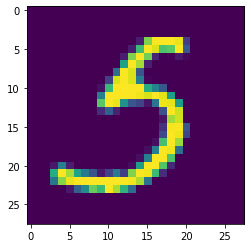

In [12]:
plt.imshow(data[0][0].view(28,28))
plt.show()

Let's talk about iterating over data and then talk about 'balancing'.

The model has no idea what is the lowest possible loss. It just tries to decrease loss as best and as easily as possible. Suppose a dataset has skewed frequencies. The model will learn the quickest way to descrease loss such that it will always predict a 3 and the model will be stuck. The model would need to get a lot worse before it can get better again.

You can modify the dataset to try to fix imbalanced data, but this rarely works out. It is better to just have balanced dataset from the start.

The following code will count how many samples we have for each

In [14]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0,4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1
        
print(counter_dict)

        

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


As you can see, the numeral one is slightly more weighted than the others. This dataset is probably balanced enough and will not cause any issues. 11% compared to 9%, the quickest way to a optimization  would be if the model guessed everything was a one. The model would only get 11% whereas random will give it 10%, chances are it will be able to work with this dataset distribution.

Data is more important than the neural network.